# Work flow of ML
1. Understanding the problem statement
1. Data ingestion
2. Data cleaning
3. EDA
4. Data preprocessing
5. Model Training
6. Selecting best model

## 1. *Problem Statement*

Our aim is how student performance effects by different parameter like\
`Gender`, `Ethnicity`,`Parentel level of education`,`Lunch` and `Test Preparation Course`.

## 2. *Data Collection*

from kaggle(https://www.kaggle.com/datasets/waqi786/student-performance-dataset)

In [1]:
# Importing libraries
import pandas as pd
import numpy  as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('C:\\Users\\DELL\\Desktop\\ML Project\\notebook\\data\\student.csv')

In [3]:
df.head()

,StudentID,Gender,Age,StudyHoursPerWeek,AttendanceRate,GPA,Major,PartTimeJob,ExtraCurricularActivities
0,1,Male,24,37,90.75,3.47,Arts,Yes,No
1,2,Female,22,37,74.90,2.32,Education,No,No
2,3,Male,22,10,53.36,2.38,Business,No,No
3,4,Male,24,10,70.26,3.46,Science,Yes,No
4,5,Male,18,19,74.87,2.31,Education,Yes,No


#### *About Dataset*

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  500 non-null    int64  
 1   Gender                     500 non-null    object 
 2   Age                        500 non-null    int64  
 3   StudyHoursPerWeek          500 non-null    int64  
 4   AttendanceRate             500 non-null    float64
 5   GPA                        500 non-null    float64
 6   Major                      500 non-null    object 
 7   PartTimeJob                500 non-null    object 
 8   ExtraCurricularActivities  500 non-null    object 
dtypes: float64(2), int64(3), object(4)
memory usage: 35.3+ KB


In [5]:
df.shape

(500, 9)

- Total we have 9 features and 500 rows.
- Our dataset is consist of multiple data type numeric and categorical.
- Have no null value 

In [7]:
# checking the duplicates
df.duplicated().sum()

0

- No duplicate values

In [8]:
# Unique values
df.nunique()


StudentID                    500
Gender                         2
Age                            7
StudyHoursPerWeek             39
AttendanceRate               472
GPA                          184
Major                          5
PartTimeJob                    2
ExtraCurricularActivities      2
dtype: int64

In [28]:
# Different categories
print (f"The categories in `Gender` column ,{df['Gender'].unique()}")
print (f"The categories in `PartTimeJob` column ,{df['PartTimeJob'].unique()}")
print (f"The categories in `Major` column ,{df['Major'].unique()}")
print (f"The categories in `ExtraCurricularActivities` column ,{df['ExtraCurricularActivities'].unique()}")

The categories in `Gender` column ,['Male' 'Female']
The categories in `PartTimeJob` column ,['Yes' 'No']
The categories in `Major` column ,['Arts' 'Education' 'Business' 'Science' 'Engineering']
The categories in `ExtraCurricularActivities` column ,['No' 'Yes']


In [15]:
# drop student ID as it g=has no use
df = df.drop('StudentID', axis=1)

In [19]:
# checking statistics of data 
df.describe()

,Age,StudyHoursPerWeek,AttendanceRate,GPA
count,500.000000,500.000000,500.000000,500.00000
mean,20.956000,19.876000,74.990380,2.98516
std,2.000517,11.471347,14.565917,0.56362
min,18.000000,1.000000,50.010000,2.00000
25%,19.000000,10.000000,62.607500,2.48750
50%,21.000000,20.500000,75.730000,3.00000
75%,23.000000,30.000000,87.220000,3.48000
max,24.000000,39.000000,99.970000,3.99000


#### **DATA INSIGHTS**

- No duplicate and null values
- Total number of categories in `Gender` is `MALE,FEMALE`
- Range of `Age` is `18-24`
-  `StudyHoursPerWeek` varies from `1hr to 39hrs` 
-  On average student `AttendanceRate ` is `75%`
-  `GPA` varies from `2 to 3.9`
-  The categories in `Major` are `'Arts' 'Education' 'Business' 'Science' 'Engineering'`
-  The categories in `ExtraCurricularActivities` are `'No' 'Yes'`


In [36]:
numeric_col = [col for col in df.columns if df[col].dtype != 'O']
categorical_col = [col for col in df.columns if df[col].dtype == 'O']
print(f"Numeric columns are: {numeric_col}")
print(f"Categorical columns are: {categorical_col}")

Numeric columns are: ['Age', 'StudyHoursPerWeek', 'AttendanceRate', 'GPA']
Categorical columns are: ['Gender', 'Major', 'PartTimeJob', 'ExtraCurricularActivities']


### **VISUALIZING**

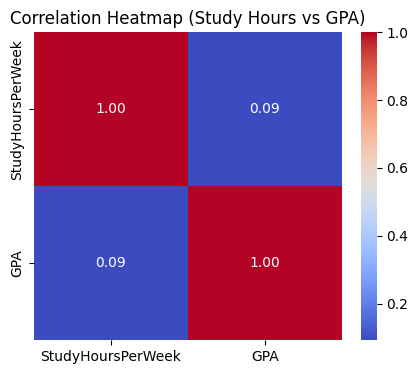

In [69]:

# Create a heatmap
correlation_matrix = df[['StudyHoursPerWeek', 'GPA']].corr()
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar=True)
plt.title('Correlation Heatmap (Study Hours vs GPA)')
plt.show()

- The correlation between StudyHoursPerWeek and GPA is very weak (0.09) means that increasing study hours does not have a notable effect on GPA in this dataset.

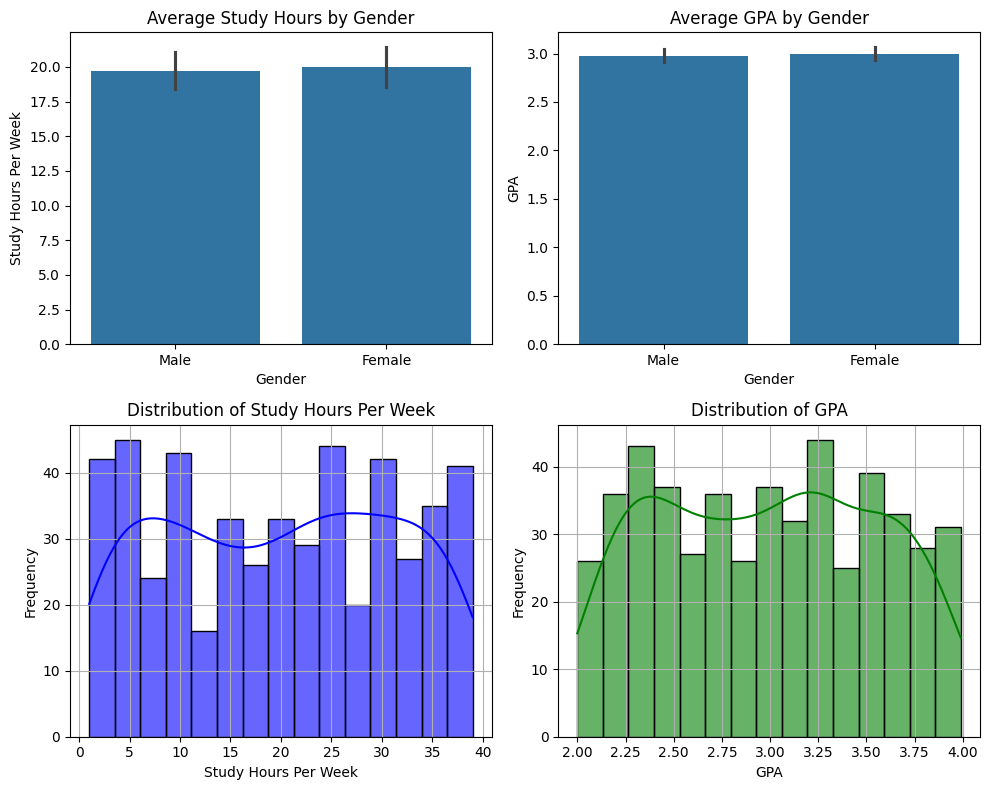

In [73]:
# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Bar plot for Study Hours by Gender
sns.barplot(data=df, x='Gender', y='StudyHoursPerWeek', ax=axs[0, 0])
axs[0, 0].set_title('Average Study Hours by Gender')
axs[0, 0].set_xlabel('Gender')
axs[0, 0].set_ylabel('Study Hours Per Week')

# Bar plot for GPA by Gender
sns.barplot(data=df, x='Gender', y='GPA', ax=axs[0, 1])
axs[0, 1].set_title('Average GPA by Gender')
axs[0, 1].set_xlabel('Gender')
axs[0, 1].set_ylabel('GPA')

# Histogram and KDE for Study Hours
sns.histplot(data=df, x='StudyHoursPerWeek', kde=True, color='blue', bins=15, alpha=0.6, ax=axs[1, 0])
axs[1, 0].set_title('Distribution of Study Hours Per Week')
axs[1, 0].set_xlabel('Study Hours Per Week')
axs[1, 0].set_ylabel('Frequency')
axs[1, 0].grid(True)

# Histogram and KDE for GPA
sns.histplot(data=df, x='GPA', kde=True, color='green', bins=15, alpha=0.6, ax=axs[1, 1])
axs[1, 1].set_title('Distribution of GPA')
axs[1, 1].set_xlabel('GPA')
axs[1, 1].set_ylabel('Frequency')
axs[1, 1].grid(True)

# Adjust layout and show plots
plt.tight_layout()
plt.show()

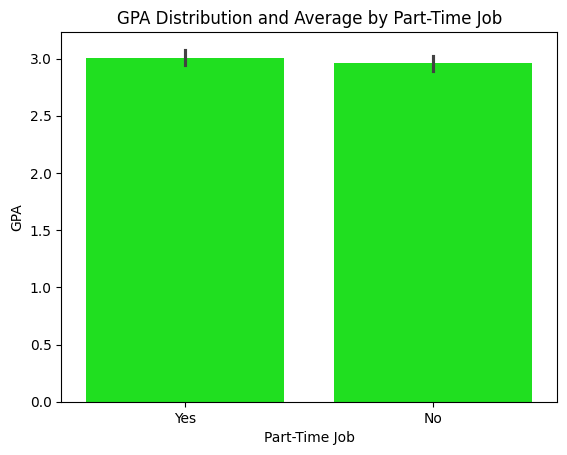

In [78]:
sns.barplot(data=df, x='PartTimeJob', y='GPA', color='lime')

# Titles and labels
plt.title('GPA Distribution and Average by Part-Time Job')
plt.xlabel('Part-Time Job')
plt.ylabel('GPA')

# Show the plot
plt.show()

- `PartTime` job has not much affect on `GPA` in this data set

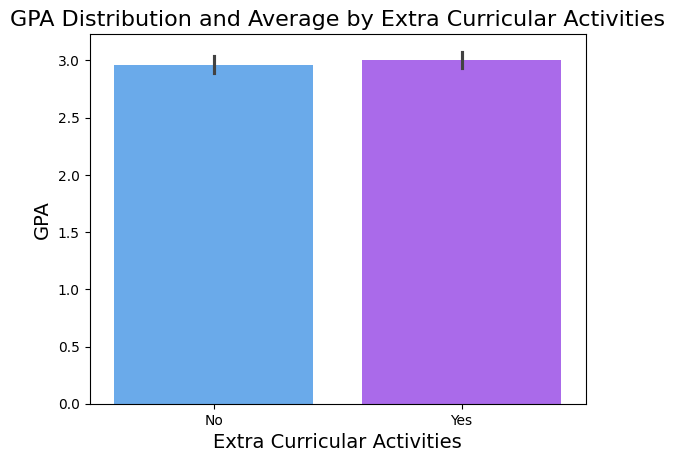

In [80]:
sns.barplot(data=df, x='ExtraCurricularActivities', y='GPA', palette='cool')

# Titles and labels
plt.title('GPA Distribution and Average by Extra Curricular Activities', fontsize=16)
plt.xlabel('Extra Curricular Activities', fontsize=14)
plt.ylabel('GPA', fontsize=14)

# Show the plot
plt.show()

- Extra Curricular Activities may affect the `GPA`

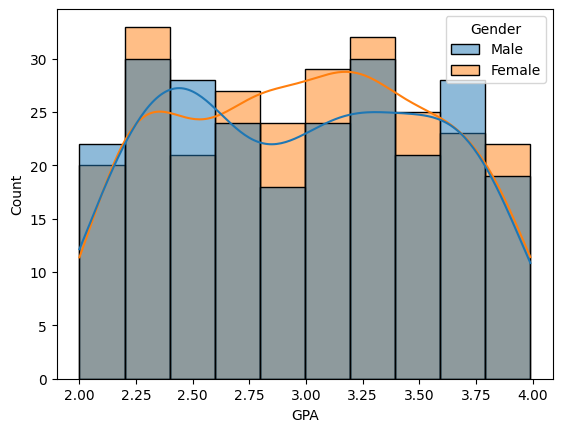

In [83]:
sns.histplot(data=df, x='GPA',kde = True , hue='Gender')
plt.show()

- Female are performing well

## 3. *DATA CLEANING*

## 5. *EDA*

## 4. *DATA PRE-PROCESSING*

## 6. *MODEL-TRAINING*

## 7. *BEST-MODEL*